In [1]:
import cv2
import imghdr
import os
import tensorflow as tf

In [2]:
data_dir = '/content/drive/MyDrive/Datasets/cnn_happy_sad' # address to the directory of your saved image data.

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # allowed formats of images.

In [4]:
# code to remove any sort of images in our datasets that are not of our suitable datatypes.
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**LOADING DATA**

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Datasets/cnn_happy_sad')

Found 364 files belonging to 3 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [8]:
batch[1][:12]


array([1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0], dtype=int32)

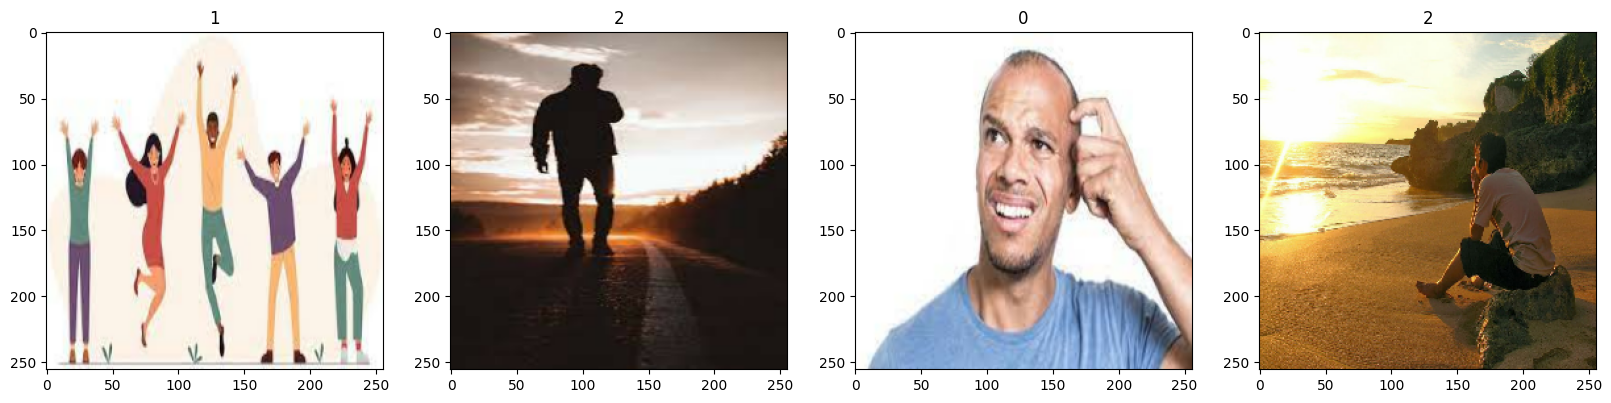

In [9]:
#visulising our labels.
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#=> 1 = happy
#=> 0 = confused
#=> 2 = sad

**SCALING**

In [10]:
data = data.map(lambda x,y: (x/255, y)) #returns normalized tuple. map is a funciton of dataset API.

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          ...,
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ]],
 
         [[0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          ...,
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ]],
 
         [[0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          ...,
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ],
          [0.92156863, 0.62352943, 0.6627451 ]],
 
         ...,
 
         [[0.9416131 , 0.7102405 , 0.7337699 ],
          [0.95294

In [12]:
len(data) # around 12X32 images

12

In [13]:
'''from sklearn.model_selection import train_test_split
images, labels = zip(*data) # converting tupled data to lists.'''

'from sklearn.model_selection import train_test_split\nimages, labels = zip(*data) # converting tupled data to lists.'

In [14]:
'''# Initial train-test split to get training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

# Further split the test set into test and cross-validation sets
test_images, cv_images, test_labels, cv_labels = train_test_split(test_images, test_labels, test_size=1/3, random_state=42)

# Now 'train_images', 'train_labels' contain the training data (70%)
# 'cv_images', 'cv_labels' contain the cross-validation data (20%)
# 'test_images', 'test_labels' contain the testing data (10%)'''# one method of doing splitting.


"# Initial train-test split to get training and test sets\ntrain_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)\n\n# Further split the test set into test and cross-validation sets\ntest_images, cv_images, test_labels, cv_labels = train_test_split(test_images, test_labels, test_size=1/3, random_state=42)\n\n# Now 'train_images', 'train_labels' contain the training data (70%)\n# 'cv_images', 'cv_labels' contain the cross-validation data (20%)\n# 'test_images', 'test_labels' contain the testing data (10%)"

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
#building layers of cnn
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [20]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
logdir='/content/drive/MyDrive/Datasets/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 14s 791ms/step - loss: 1.5592 - accuracy: 0.3398 - val_loss: 1.0087 - val_accuracy: 0.6875
Epoch 2/20
8/8 [==============================] - 6s 572ms/step - loss: 0.9180 - accuracy: 0.6250 - val_loss: 0.9404 - val_accuracy: 0.6042
Epoch 3/20
8/8 [==============================] - 6s 557ms/step - loss: 0.9482 - accuracy: 0.5898 - val_loss: 0.8168 - val_accuracy: 0.6979
Epoch 4/20
8/8 [==============================] - 7s 638ms/step - loss: 0.7715 - accuracy: 0.7188 - val_loss: 0.7904 - val_accuracy: 0.6875
Epoch 5/20
8/8 [==============================] - 8s 880ms/step - loss: 0.6800 - accuracy: 0.7461 - val_loss: 0.5893 - val_accuracy: 0.7708
Epoch 6/20
8/8 [==============================] - 6s 537ms/step - loss: 0.5960 - accuracy: 0.7461 - val_loss: 0.5292 - val_accuracy: 0.7917
Epoch 7/20
8/8 [==============================] - 7s 697ms/step - loss: 0.4699 - accuracy: 0.8125 - val_loss: 0.4062 - val_accuracy: 0.8333
Epoch 8/20
8/8 [===

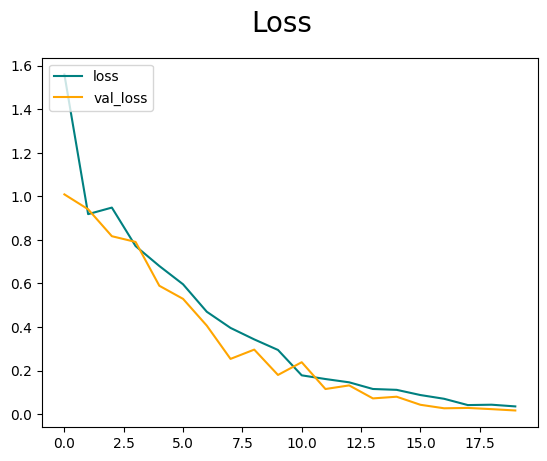

In [23]:
#plotting losses of training vs cross validation set using tensorboard
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#reduction in loss of both sets is almost similar hense we can observe no overfitting.

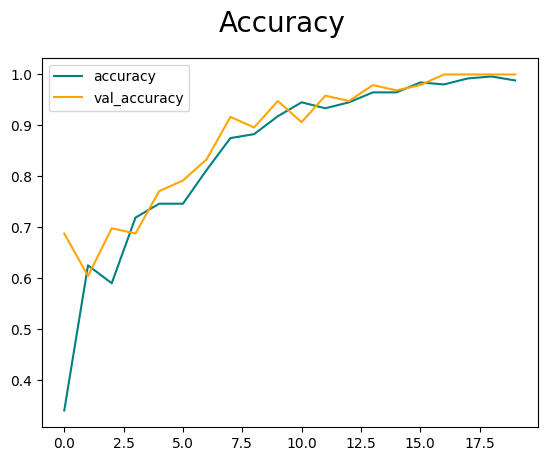

In [24]:
#plotting accuracy scores of both the sets.
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**NO PIRTICULAR OVERFITTING OF DATA IS OBSERVED.**

**Testing on random examples**

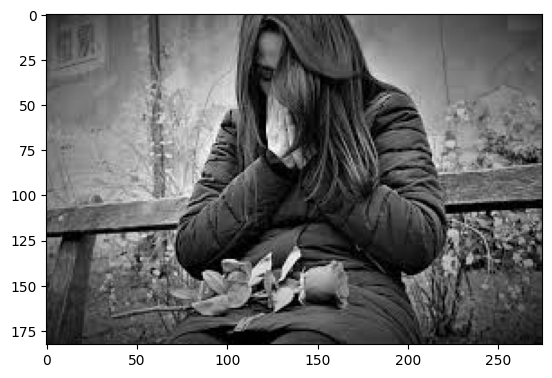

In [38]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Datasets/test images/images.jpg')# RANDOM SAD IMAGE.
plt.imshow(img)
plt.show()

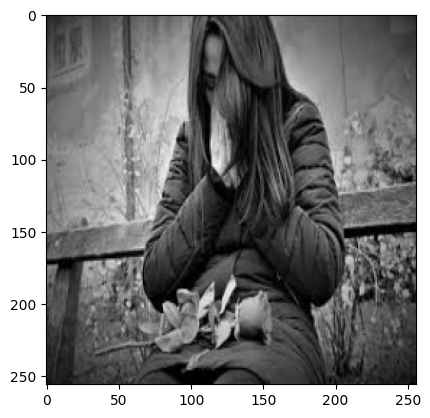

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 20ms/step


array([[1.6350357e-04, 1.4632010e-03, 9.9837327e-01]], dtype=float32)

In [41]:
pred = np.argmax(yhat)
classes = ['confused','happy','sad']
predicted_class = classes[pred]
print(f'Predicted class is: {predicted_class}')

Predicted class is: sad


SAVING TRAINED MODEL

In [45]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/Datasets/Models/emotion_classification_cnn.h5")#address to model save folder.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:

# Load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/Models/emotion_classification_cnn.h5")
